#1.파일읽기


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##1.1 모델 읽기

In [2]:
from keras.models import load_model
model_path='/content/drive/MyDrive/17. 이미지 분석2/model/mnist_v1.h5'
model = load_model(model_path)

##1.2 이미지 읽기

In [3]:
import cv2

img_path = '/content/drive/MyDrive/17. 이미지 분석2/KakaoTalk_20210819_160241638.png'
img = cv2.imread(img_path)

##1.3 이미지 출력

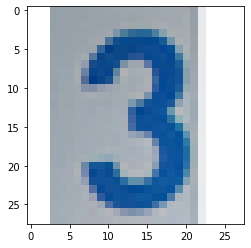

In [4]:
import matplotlib.pyplot as plt

plt.imshow(img,cmap=plt.cm.binary)
plt.show()

#2. 예측하기

##2.1 단색변환

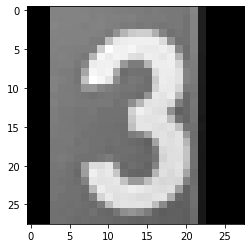

In [7]:
import cv2
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img_gray, cmap=plt.cm.binary)
plt.show()

##2.2 차원 축소

In [8]:
img_gray.shape

(28, 28)

In [11]:
img_gray_reshape = img_gray.reshape(1,28*28)
img_gray_reshape = img_gray_reshape.astype('float32')/255

##2.3 예측하기

In [12]:
import pandas as pd

pred = model.predict(img_gray_reshape)

s=pd.Series(pred[0])
s.sort_values(ascending=False)

2    1.000000e+00
7    1.500170e-11
5    1.037879e-13
6    8.976915e-15
0    1.126645e-22
8    5.111014e-29
3    2.983025e-29
1    1.312662e-37
9    0.000000e+00
4    0.000000e+00
dtype: float32

##2.4 숫자 치환

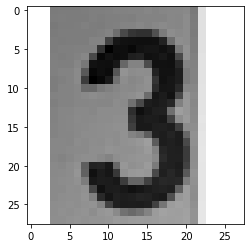

In [15]:
import cv2
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
reverse_img_gray = 255 - img_gray
plt.imshow(reverse_img_gray,cmap=plt.cm.binary)
plt.show()

##2.5 예측하기

In [16]:
reverse_img_gray_reshape = reverse_img_gray.reshape(1,28*28)
reverse_img_gray_reshape = reverse_img_gray_reshape.astype('float32')/255

In [17]:
import pandas as pd

pred = model.predict(reverse_img_gray_reshape)


s= pd.Series(pred[0])
s.sort_values(ascending=False)

3    9.988702e-01
7    9.948763e-04
2    1.311558e-04
6    2.233020e-06
8    9.283920e-07
5    6.048650e-07
0    1.978938e-08
9    4.159218e-09
1    1.145629e-12
4    5.267597e-22
dtype: float32